#Import libraries 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

#Import data

In [0]:
Test = pd.read_csv('Test.csv')
Train = pd.read_csv('Train.csv')
Riders = pd.read_csv('Riders.csv')
SampleSubmission = pd.read_csv('SampleSubmission.csv')
VariableDefinitions = pd.read_csv('VariableDefinitions.csv')

#Exploratory Data Analysis

In [185]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

Observations:

*   The 'Time' columns are stored as object datatypes instead of date_time
*   The 'Temperature' and 'Percipitation' columns contain Null values
*   There are a few ID columns that can be dropped for the purpose of training the models
* The 'Vehicle Type' column can be dropped since all the entries are 'Bike'
* The 'Personal or Business' column only contains the strings 'personal'and 'business' this will have to be encoded before the data can be used to train the models 






In [186]:
Train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


Observations:

*   The 'Platform Type' column only contains the numbers 1 - 4, which corresponds to the different platforms customers can use to place their orders.
*   The average distance travelled to deliver an order is 9.5km with a std of 5.7km.
* The arverage Temperature at the time of delivery is 23 degrees celcius with a std of 3.2.



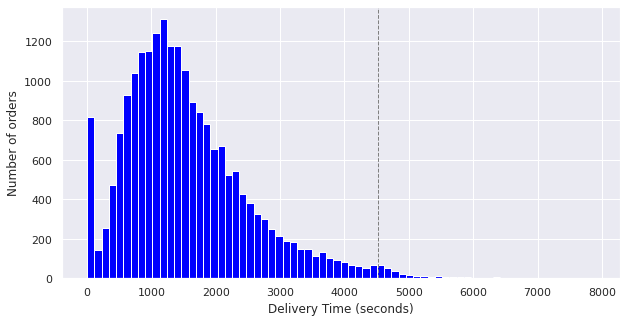

In [187]:
# Plotting a histogram of delivery times and outlier threshold

mu = Train.iloc[:,28].mean()
sd = Train.iloc[:,28].std()
li = mu + 3*sd

sns.set()
_ = plt.figure(figsize = (10,5))
_ = plt.hist(Train.iloc[:,28], bins = 70, color = 'blue')
_ = plt.xlabel('Delivery Time (seconds)')
_ = plt.ylabel('Number of orders')
_ = plt.axvline(li, color = 'gray', linestyle = 'dashed', linewidth = 1)
plt.show()


From the histogram plot above it’s clear that the delivery times are skewed, with the majority of orders being delivered in about 16 minutes 

The grey dotted line above indicates the threshold for existance of outliers (measured by the presence of values 3 standard deviation away from the mean.)

# Checking for Multicolinearity

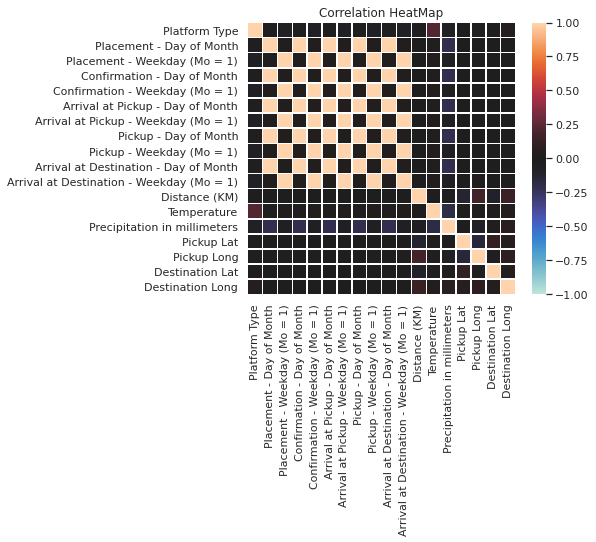

In [188]:
features = Train.iloc[:,:-1]
targets = Train.iloc[:,-1]

#creating pairwise correlation of columns using Pearson's R,
corr = features.corr(method='pearson') 

#plotting the correlation coefficients on a seasborn heatmap matrix
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, xticklabels=corr.columns, 
            yticklabels=corr.columns, ax=ax, linewidths=.5, 
            vmin = -1, vmax=1, center=0)

plt.title('Correlation HeatMap')
plt.show()

# Converting data types and dealing with missing values

In [189]:
# converting object data types to date_time 
Train['Placement - Time'] = pd.to_datetime(Train['Placement - Time'])
Train['Confirmation - Time'] = pd.to_datetime(Train['Confirmation - Time'])
Train['Arrival at Pickup - Time'] = pd.to_datetime(Train['Arrival at Pickup - Time'])
Train['Pickup - Time'] = pd.to_datetime(Train['Pickup - Time'])
Train['Arrival at Destination - Time'] = pd.to_datetime(Train['Arrival at Destination - Time'])

# Replacing Null values in the temperature column with the average value 
from sklearn.impute import SimpleImputer
imputer_temp = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
imputer_temp.fit(Train.iloc[:,20:22])
Train.iloc[:,20:22] = imputer_temp.transform(Train.iloc[:,20:22])

# Replacing the Null values in the precipitation column with 0
imputer_prec = SimpleImputer(missing_values = np.NaN, strategy = 'constant', fill_value = 0)
imputer_prec.fit(Train.iloc[:,22:])
Train.iloc[:,22:] = imputer_prec.transform(Train.iloc[:,22:])         

# Drop Vehcle type column since we are only dealing with bikes 
# Train.drop('Vehicle Type', axis=1, inplace=True)
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Order No                                   21201 non-null  object        
 1   User Id                                    21201 non-null  object        
 2   Vehicle Type                               21201 non-null  object        
 3   Platform Type                              21201 non-null  int64         
 4   Personal or Business                       21201 non-null  object        
 5   Placement - Day of Month                   21201 non-null  int64         
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64         
 7   Placement - Time                           21201 non-null  datetime64[ns]
 8   Confirmation - Day of Month                21201 non-null  int64         
 9   Confirmation - We

# Encode Categorical data
The 'business or personal' column needs to be converted to 1's and 0's

> Business = 1

> Personal = 0



In [0]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

#ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [4])], remainder = 'passthrough')
#Train = np.array(ct.fit_transform(Train))